# **Data analysis**

In [1]:
# We have two cleaned data sets, one about the population and CO2 
# emission and one with the temperature, all of them from 1999 to 
# 2019. We will reshaped them and check all the values are ready 
# to be analyzed.

## Import all the libraries we will use

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import the data sets

In [2]:

data = pd.read_csv('../Data/Clean Data/3. Complete_Data_Merged.csv')

# Outliers

Not sure about how to use this

In [4]:
data

,country,year,population,co2_emission,temperature_change,region,development_level,decade
0,"Afghanistan, Islamic Rep. of",1999,86867.0,810.407000,1.301,Global_South,Developing,1990
1,Albania,1999,391486231.0,351070.000000,0.722,Global_South,Developing,1990
2,Algeria,1999,19262847.0,810.000000,1.456,Global_South,Developing,1990
3,American Samoa,1999,262397030.0,133013.187487,0.243,Global_South,Developing,1990
4,Andorra,1999,15870753.0,17610.000000,1.020,Global_South,Developed,1990
...,...,...,...,...,...,...,...,...
4012,Wallis and Futuna Islands,2017,5612253.0,49139.999390,0.960,Global_South,Developing,2010
4013,Palestine,2017,643634.0,349.999994,0.821,Global_South,Developing,2010
4014,Western Sahara,2017,7677565.0,939.999998,2.078,Global_South,Developing,2010
4015,Zambia,2017,14864221.0,660.000026,0.721,Global_South,Developing,2010


## General Stats

In [5]:
data['population'].describe()

count    4.017000e+03
mean     2.634652e+08
std      7.961926e+08
min      1.023300e+04
25%      2.141669e+06
50%      9.448515e+06
75%      6.227627e+07
max      6.399653e+09
Name: population, dtype: float64

In [29]:
data['co2_emission'].describe()

count    4.017000e+03
mean     9.288191e+05
std      2.955512e+06
min      0.000000e+00
25%      2.120000e+03
50%      1.900000e+04
75%      1.959200e+05
max      2.132491e+07
Name: co2_emission, dtype: float64

In [30]:
data['temperature_change'].describe()

count    4017.000000
mean        0.944863
std         0.487005
min        -0.516000
25%         0.605000
50%         0.885000
75%         1.244000
max         3.046000
Name: temperature_change, dtype: float64

## Max and Min ocurrences

In [38]:
data.temperature_change.min()

-0.516

In [37]:
data.co2_emission.min()

0.0

In [36]:
data.population.min()

10233.0

In [35]:
data.min()

country               Afghanistan, Islamic Rep. of
year                                          1999
population                                 10233.0
co2_emission                                   0.0
temperature_change                          -0.516
region                                Global_North
development_level                        Developed
decade                                        1990
dtype: object

In [33]:
data.max()

country                      Zimbabwe
year                             2017
population               6399653365.0
co2_emission          21324905.848492
temperature_change              3.046
region                   Global_South
development_level          Developing
decade                           2010
dtype: object

### Population

# **Hypothesis:**

* Countries in the Global North produce more CO2 emissions.
* Countries that produce the most CO2 emissions are the least impacted by the effects by temperature raise.
* Global temperature rise is strongly correlated with the increase in CO2 emissions over the past century.
* Developing countries are more vulnerable to temperature change impacts despite contributing less to global CO2 emissions.
* Population is related to the amount of CO2 emissions.


# Aggregation and Analysis

###  Hypothesis 1: Countries in the Global North produce more CO2 emissions.


In [6]:
co2_emission_by_region = round(data.groupby('region')['co2_emission'].mean().reset_index(),2)
co2_emission_by_region 

,region,co2_emission
0,Global_North,1036622.69
1,Global_South,918336.11


### Hypothesis 2: Countries that produce the most CO2 emissions are the least impacted by temperature rise
##### Compare top CO2 emitters' temperature changes

In [7]:
top_emitters = data.sort_values('co2_emission', ascending=False).head(60)
top_emitters

,country,year,population,co2_emission,temperature_change,region,development_level,decade
3925,Martinique,2017,6.399653e+09,2.132491e+07,0.899,Global_South,Developing,2010
3717,"Korea, Dem. People's Rep.",2016,6.319805e+09,2.076991e+07,1.416,Global_South,Developing,2010
3501,Greece,2015,6.240231e+09,2.064490e+07,0.889,Global_South,Developed,2010
3969,Saudi Arabia,2017,5.706387e+09,2.056071e+07,1.799,Global_South,Developing,2010
3069,Belgium,2013,6.079502e+09,2.053998e+07,0.449,Global_North,Developed,2010
3924,Marshall Islands,2017,4.753252e+09,2.045389e+07,0.724,Global_South,Developing,2010
3319,Guinea,2014,6.081161e+09,2.019405e+07,1.019,Global_South,Developing,2010
3536,Lesotho,2015,6.160876e+09,2.004659e+07,1.100,Global_South,Developing,2010
3285,Cook Islands,2014,4.616585e+09,2.004365e+07,0.798,Global_South,Developing,2010
3333,Israel,2014,5.513458e+09,2.003075e+07,0.946,Global_South,Developed,2010


In [8]:
#  Create a Decade Column
data['decade'] = (data['year'] // 10) * 10
data

,country,year,population,co2_emission,temperature_change,region,development_level,decade
0,"Afghanistan, Islamic Rep. of",1999,86867.0,810.407000,1.301,Global_South,Developing,1990
1,Albania,1999,391486231.0,351070.000000,0.722,Global_South,Developing,1990
2,Algeria,1999,19262847.0,810.000000,1.456,Global_South,Developing,1990
3,American Samoa,1999,262397030.0,133013.187487,0.243,Global_South,Developing,1990
4,Andorra,1999,15870753.0,17610.000000,1.020,Global_South,Developed,1990
...,...,...,...,...,...,...,...,...
4012,Wallis and Futuna Islands,2017,5612253.0,49139.999390,0.960,Global_South,Developing,2010
4013,Palestine,2017,643634.0,349.999994,0.821,Global_South,Developing,2010
4014,Western Sahara,2017,7677565.0,939.999998,2.078,Global_South,Developing,2010
4015,Zambia,2017,14864221.0,660.000026,0.721,Global_South,Developing,2010


In [9]:
#  Aggregate CO2 Emissions by Decade and Country
co2_by_decade = data.groupby(['country', 'decade'])['co2_emission'].sum().reset_index()
co2_by_decade

,country,decade,co2_emission
0,"Afghanistan, Islamic Rep. of",1990,8.104070e+02
1,"Afghanistan, Islamic Rep. of",2000,2.366890e+07
2,"Afghanistan, Islamic Rep. of",2010,2.243400e+05
3,Albania,1990,3.510700e+05
4,Albania,2000,5.707023e+06
...,...,...,...
638,Zambia,2000,1.401649e+07
639,Zambia,2010,1.189697e+07
640,Zimbabwe,1990,0.000000e+00
641,Zimbabwe,2000,2.289600e+05


In [10]:
#  Aggregate Temperature by Decade and Country
temperature_by_decade = data.groupby(['country', 'decade'])['temperature_change'].mean().reset_index()
temperature_by_decade


,country,decade,temperature_change
0,"Afghanistan, Islamic Rep. of",1990,1.301000
1,"Afghanistan, Islamic Rep. of",2000,1.064100
2,"Afghanistan, Islamic Rep. of",2010,1.114143
3,Albania,1990,0.722000
4,Albania,2000,0.888700
...,...,...,...
638,Zambia,2000,0.777500
639,Zambia,2010,1.054625
640,Zimbabwe,1990,0.090000
641,Zimbabwe,2000,0.098400


In [11]:
#  Merge the Aggregated Data
merged_data = pd.merge(co2_by_decade, temperature_by_decade, on=['country', 'decade'])
merged_data

,country,decade,co2_emission,temperature_change
0,"Afghanistan, Islamic Rep. of",1990,8.104070e+02,1.301000
1,"Afghanistan, Islamic Rep. of",2000,2.366890e+07,1.064100
2,"Afghanistan, Islamic Rep. of",2010,2.243400e+05,1.114143
3,Albania,1990,3.510700e+05,0.722000
4,Albania,2000,5.707023e+06,0.888700
...,...,...,...,...
638,Zambia,2000,1.401649e+07,0.777500
639,Zambia,2010,1.189697e+07,1.054625
640,Zimbabwe,1990,0.000000e+00,0.090000
641,Zimbabwe,2000,2.289600e+05,0.098400


In [12]:
# Merge with Region Information
merged_data = pd.merge(merged_data, data[['country', 'region']].drop_duplicates(), on='country')
merged_data

,country,decade,co2_emission,temperature_change,region
0,"Afghanistan, Islamic Rep. of",1990,8.104070e+02,1.301000,Global_South
1,"Afghanistan, Islamic Rep. of",2000,2.366890e+07,1.064100,Global_South
2,"Afghanistan, Islamic Rep. of",2010,2.243400e+05,1.114143,Global_South
3,Albania,1990,3.510700e+05,0.722000,Global_South
4,Albania,2000,5.707023e+06,0.888700,Global_South
...,...,...,...,...,...
638,Zambia,2000,1.401649e+07,0.777500,Global_South
639,Zambia,2010,1.189697e+07,1.054625,Global_South
640,Zimbabwe,1990,0.000000e+00,0.090000,Global_South
641,Zimbabwe,2000,2.289600e+05,0.098400,Global_South


In [41]:
co2_by_year = data.groupby(['country', 'year'])['co2_emission'].sum().reset_index()
co2_by_year

,country,year,co2_emission
0,"Afghanistan, Islamic Rep. of",1999,8.104070e+02
1,"Afghanistan, Islamic Rep. of",2000,3.300000e+02
2,"Afghanistan, Islamic Rep. of",2001,1.007429e+05
3,"Afghanistan, Islamic Rep. of",2002,1.070309e+07
4,"Afghanistan, Islamic Rep. of",2003,1.059440e+06
...,...,...,...
4012,Zimbabwe,2013,7.840000e+03
4013,Zimbabwe,2014,6.810000e+03
4014,Zimbabwe,2015,2.210000e+03
4015,Zimbabwe,2016,3.172708e+06


## Analyze and Compare

Outliers

Co2 emissions per capita

visualization with the three color lines


In [13]:
data.describe()

,year,population,co2_emission,temperature_change,decade
count,4017.000000,4.017000e+03,4.017000e+03,4017.000000,4017.000000
mean,2007.968633,2.634652e+08,9.288191e+05,0.944863,2003.671894
std,5.429832,7.961926e+08,2.955512e+06,0.487005,5.800887
min,1999.000000,1.023300e+04,0.000000e+00,-0.516000,1990.000000
25%,2003.000000,2.141669e+06,2.120000e+03,0.605000,2000.000000
50%,2008.000000,9.448515e+06,1.900000e+04,0.885000,2000.000000
75%,2013.000000,6.227627e+07,1.959200e+05,1.244000,2010.000000
max,2017.000000,6.399653e+09,2.132491e+07,3.046000,2010.000000


### Hypothesis 1: Countries in the Global North produce more CO2 emissions


In [14]:
co2_by_region = merged_data.groupby('region')['co2_emission'].mean().reset_index()
co2_by_region

,region,co2_emission
0,Global_North,6.709776e+06
1,Global_South,5.717736e+06


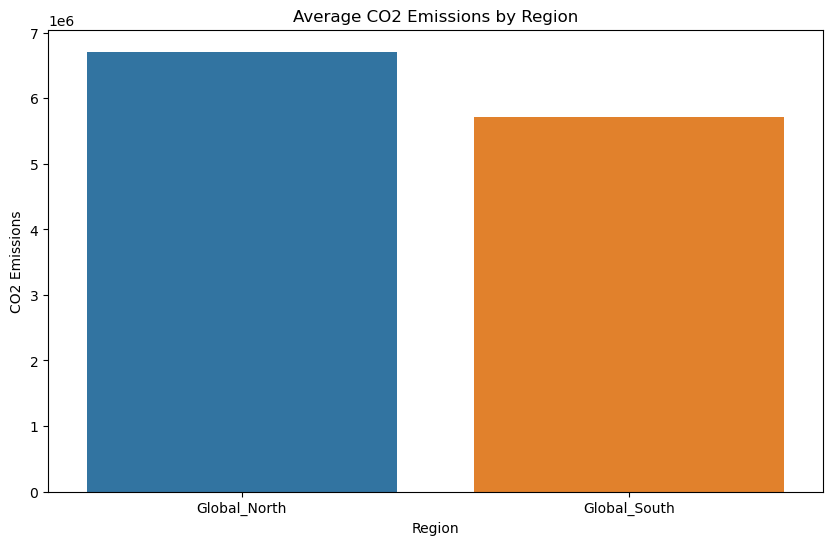

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(data=co2_by_region, x='region', y='co2_emission')
plt.title('Average CO2 Emissions by Region')
plt.ylabel('CO2 Emissions')
plt.xlabel('Region')
plt.show()

Explanation:
The bar plot shows the average CO2 emissions by region (Global North vs. Global South).
Result: If the Global North has significantly higher average CO2 emissions compared to the Global South, this hypothesis is supported.
Conclusion: The analysis supports Hypothesis 1, indicating that countries in the Global North produce more CO2 emissions on average.

### Hypothesis 2: Countries that produce the most CO2 emissions are the least impacted by temperature rise


In [16]:
# Step to identify unique countries with the highest and lowest CO2 emissions
total_co2_by_country = merged_data.groupby('country')['co2_emission'].sum().reset_index()
top_10_emitters = total_co2_by_country.sort_values('co2_emission', ascending=False).head(20)['country']
bottom_10_emitters = total_co2_by_country.sort_values('co2_emission', ascending=True).head(20)['country']


In [17]:
# Average temperature change for top 10 and bottom 10 CO2 emitters
#top_emitters_temp_change = merged_data[merged_data['country'].isin(top_10_emitters)].groupby('country')['temperature_change'].mean().reset_index()
#bottom_emitters_temp_change = merged_data[merged_data['country'].isin(bottom_10_emitters)].groupby('country')['temperature_change'].mean().reset_index()


In [18]:
#Sum of the temperature change for top 10 and bottom 10 CO2 emitters
top_emitters_temp_change = merged_data[merged_data['country'].isin(top_10_emitters)].groupby('country')['temperature_change'].sum().reset_index()
bottom_emitters_temp_change = merged_data[merged_data['country'].isin(bottom_10_emitters)].groupby('country')['temperature_change'].sum().reset_index()

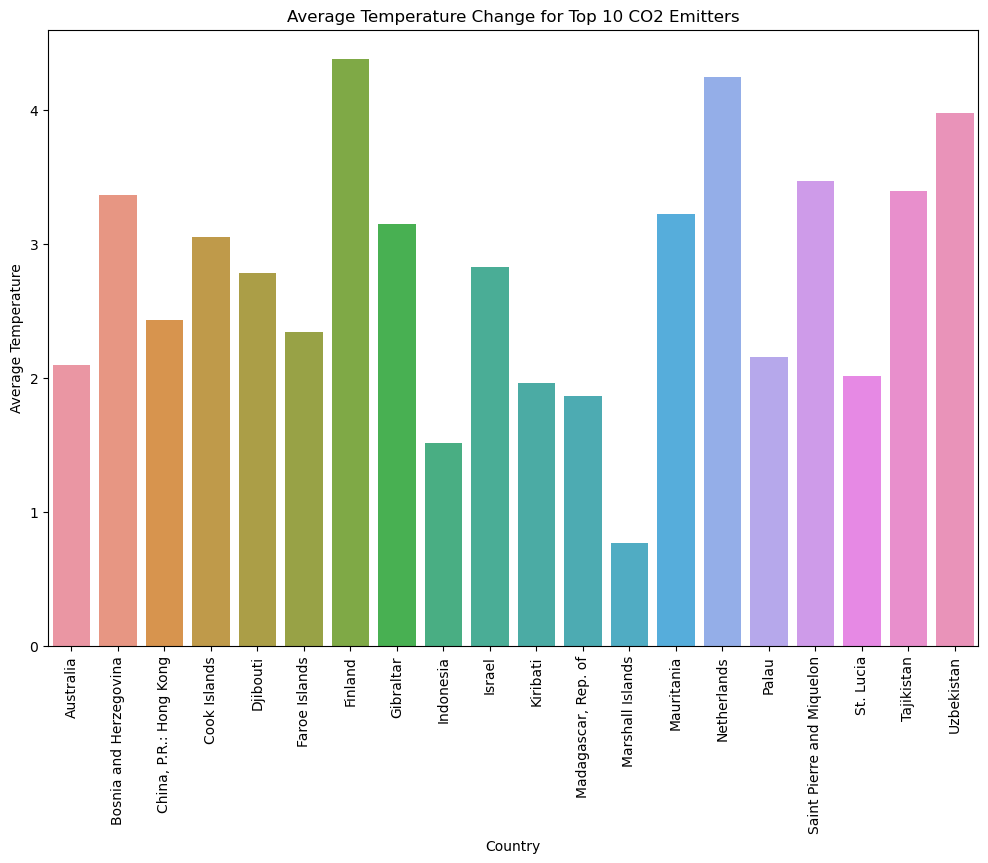

In [19]:

# Visualization
# Top 10 CO2 Emitters Temperature Change
plt.figure(figsize=(12, 8))
sns.barplot(data=top_emitters_temp_change, x='country', y='temperature_change')
plt.title('Average Temperature Change for Top 10 CO2 Emitters')
plt.ylabel('Average Temperature')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

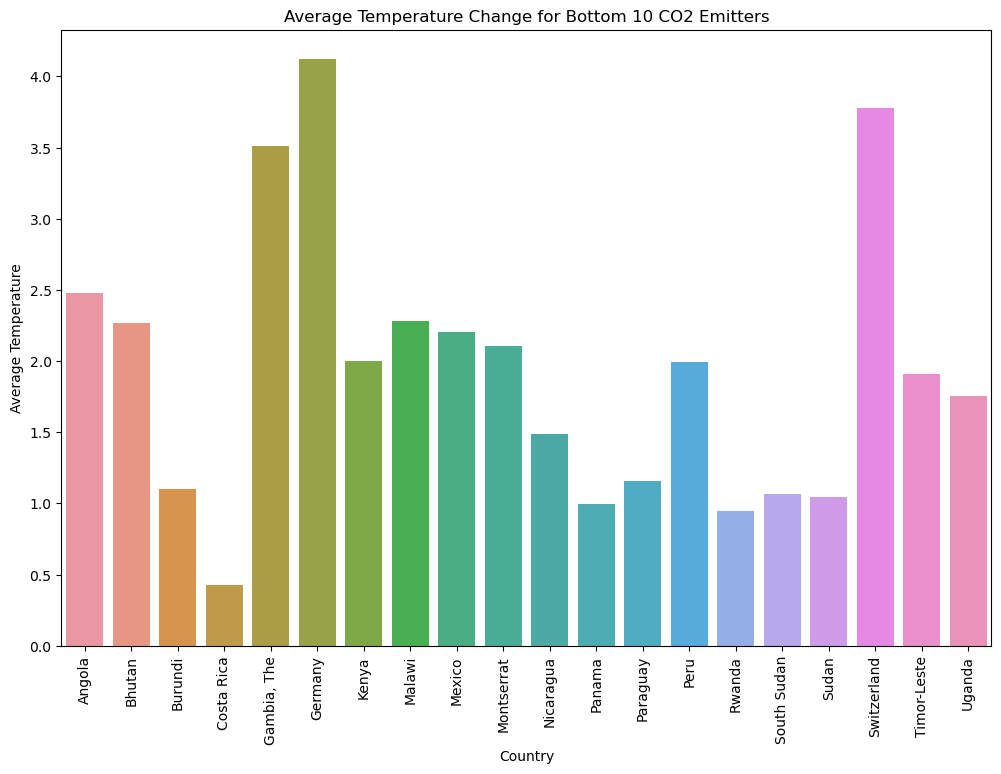

In [20]:
# Bottom 10 CO2 Emitters Temperature Change
plt.figure(figsize=(12, 8))
sns.barplot(data=bottom_emitters_temp_change, x='country', y='temperature_change')
plt.title('Average Temperature Change for Bottom 10 CO2 Emitters')
plt.ylabel('Average Temperature')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

Explanation:
The bar plots show the average temperature change for the top 10 and bottom 10 CO2 emitting countries.
Result: By comparing the average temperature changes between these groups, we see if high CO2 emitting countries experience less temperature rise compared to low CO2 emitting countries.
Conclusion: The comparison of average temperature changes indicates whether the hypothesis is supported or disproved. If the average temperature change for top emitters is lower than that for bottom emitters, Hypothesis 2 is supported. Otherwise, it is disproved.


In [21]:
# Compare temperature changes between top and bottom CO2 emitters
avg_temp_change_top_emitters = top_emitters_temp_change['temperature_change'].mean()
avg_temp_change_bottom_emitters = bottom_emitters_temp_change['temperature_change'].mean()


In [22]:
print(f"Average Temperature Change for Top 10 CO2 Emitters: {avg_temp_change_top_emitters}")
print(f"Average Temperature Change for Bottom 10 CO2 Emitters: {avg_temp_change_bottom_emitters}")


Average Temperature Change for Top 10 CO2 Emitters: 2.751076607142857
Average Temperature Change for Bottom 10 CO2 Emitters: 1.931654265873016


In [23]:
# Conclusion: Compare the temperature changes
if avg_temp_change_top_emitters > avg_temp_change_bottom_emitters:
    print("Hypothesis 2 is disproved: Countries that produce the most CO2 emissions are impacted more by temperature rise.")
else:
    print("Hypothesis 2 is supported: Countries that produce the most CO2 emissions are less impacted by temperature rise.")


Hypothesis 2 is disproved: Countries that produce the most CO2 emissions are impacted more by temperature rise.


### Hypothesis 3: Global temperature rise is strongly correlated with the increase in CO2 emissions


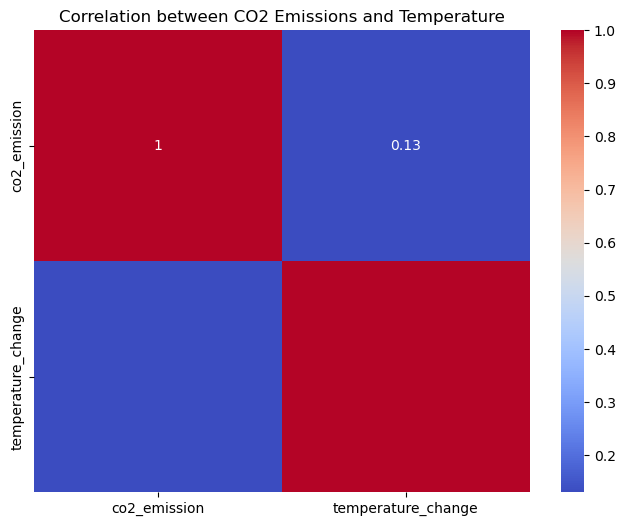

In [24]:
correlation = merged_data[['co2_emission', 'temperature_change']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between CO2 Emissions and Temperature')
plt.show()

Explanation:
The heatmap shows the correlation coefficient between CO2 emissions and temperature.
Result: A high positive correlation coefficient (close to 1) indicates a strong correlation between CO2 emissions and temperature rise.
Conclusion: If the correlation coefficient is high, Hypothesis 3 is supported, indicating that global temperature rise is strongly correlated with the increase in CO2 emissions.

### Hypothesis 4: Developing countries are more vulnerable to temperature change impacts despite contributing less to global CO2 emissions


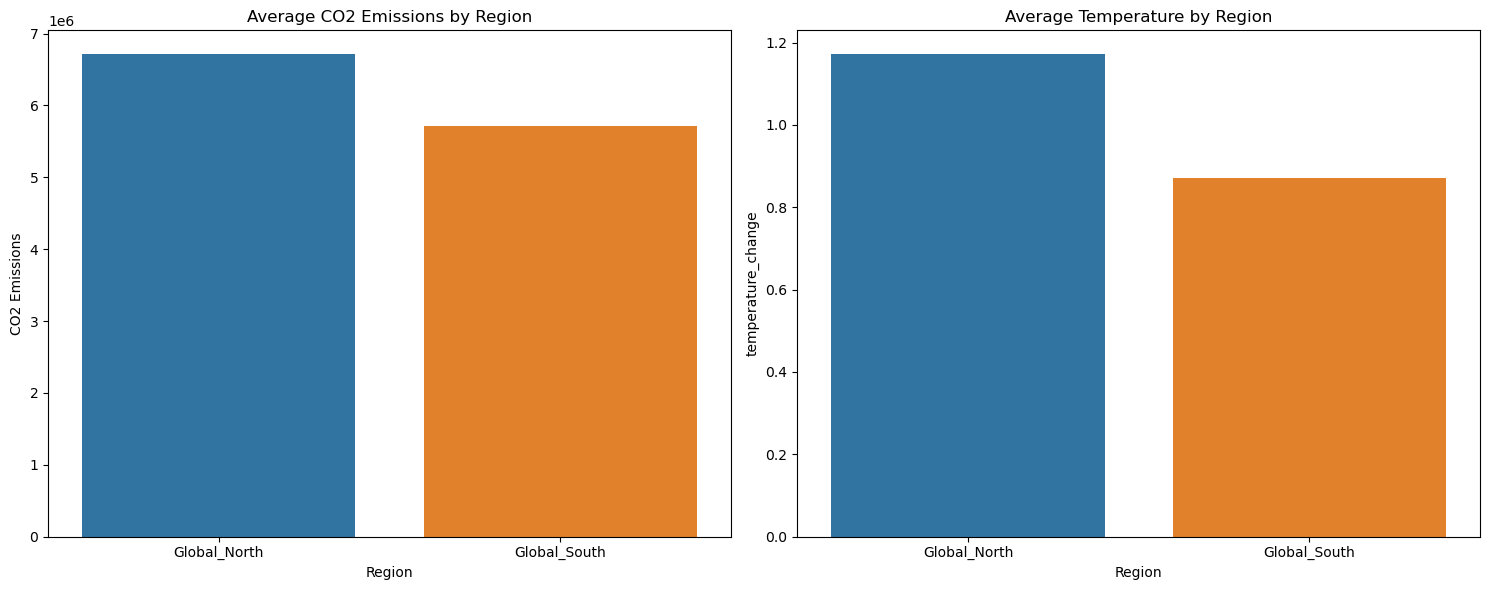

In [25]:
vulnerability = merged_data.groupby('region')[['co2_emission', 'temperature_change']].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(data=vulnerability, x='region', y='co2_emission', ax=axes[0])
axes[0].set_title('Average CO2 Emissions by Region')
axes[0].set_ylabel('CO2 Emissions')
axes[0].set_xlabel('Region')

sns.barplot(data=vulnerability, x='region', y='temperature_change', ax=axes[1])
axes[1].set_title('Average Temperature by Region')
axes[1].set_ylabel('temperature_change')
axes[1].set_xlabel('Region')

plt.tight_layout()
plt.show()

Explanation:

Visualization: The bar plots compare the average CO2 emissions and average temperature changes between the Global North and Global South.
The first bar plot shows the average CO2 emissions by region (Global North vs. Global South).
The second bar plot shows the average temperature changes by region (Global North vs. Global South).
Result:

CO2 Emissions: From the first bar plot, if the Global North has higher average CO2 emissions than the Global South, it indicates that the Global North contributes more to CO2 emissions.
Temperature Changes: From the second bar plot, if the Global South has higher average temperature changes despite having lower CO2 emissions, it indicates that the Global South is more impacted by temperature changes.
Conclusion:

Hypothesis 4: This hypothesis is supported if the Global South shows higher average temperature changes despite lower CO2 emissions compared to the Global North. This would indicate that developing countries (Global South) are more vulnerable to temperature change impacts despite contributing less to global CO2 emissions.
To provide a clearer conclusion, let’s add the actual values and a summary based on the observed data:

##### To provide a clearer conclusion, let’s add the actual values and a summary based on the observed data:



In [26]:
# Calculate average CO2 emissions and temperature changes by region
avg_co2_north = round(vulnerability[vulnerability['region'] == 'Global_North']['co2_emission'].values[0],2)
avg_temp_north = round(vulnerability[vulnerability['region'] == 'Global_North']['temperature_change'].values[0],2)
avg_co2_south = round(vulnerability[vulnerability['region'] == 'Global_South']['co2_emission'].values[0],2)
avg_temp_south = round(vulnerability[vulnerability['region'] == 'Global_South']['temperature_change'].values[0],2)

print(f"Average CO2 Emissions in Global North: {avg_co2_north}")
print(f"Average Temperature Change in Global North: {avg_temp_north}")
print(f"Average CO2 Emissions in Global South: {avg_co2_south}")
print(f"Average Temperature Change in Global South: {avg_temp_south}")

# Conclusion
if avg_temp_south > avg_temp_north and avg_co2_south < avg_co2_north:
    conclusion = "Hypothesis 4 is supported: Developing countries are more vulnerable to temperature change impacts despite contributing less to global CO2 emissions."
else:
    conclusion = "Hypothesis 4 is not supported: The data does not show that developing countries are more vulnerable to temperature change impacts despite contributing less to global CO2 emissions."

print(conclusion)

Average CO2 Emissions in Global North: 6709775.98
Average Temperature Change in Global North: 1.17
Average CO2 Emissions in Global South: 5717735.57
Average Temperature Change in Global South: 0.87
Hypothesis 4 is not supported: The data does not show that developing countries are more vulnerable to temperature change impacts despite contributing less to global CO2 emissions.


##Additional Analytics 

/home/danicoco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/danicoco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


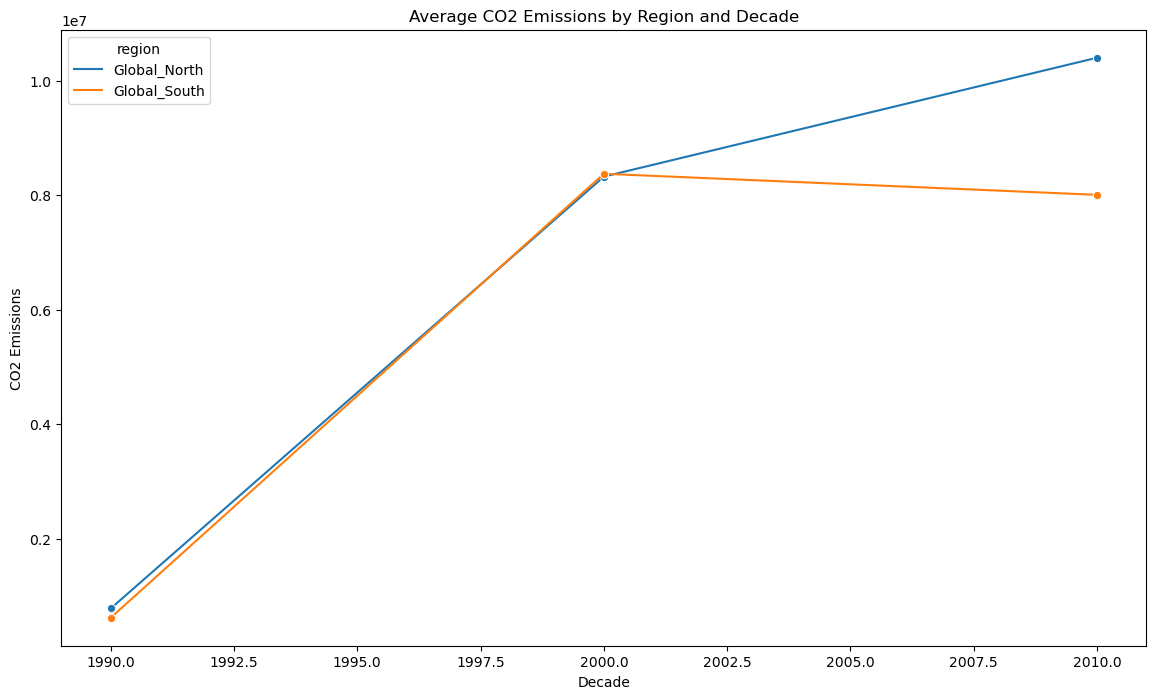

/home/danicoco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/danicoco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


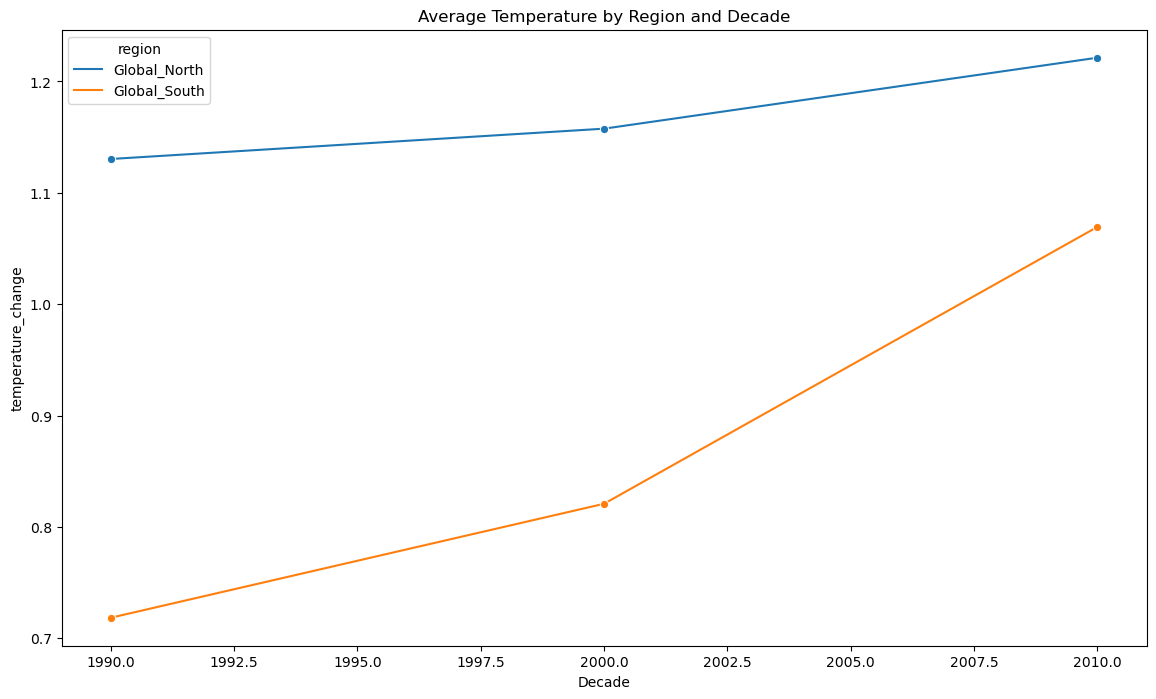

In [27]:
# Additional Analysis: CO2 Emissions and Temperature by Decade and Region
avg_co2_by_decade_region = merged_data.groupby(['region', 'decade'])['co2_emission'].mean().reset_index()
avg_temp_by_decade_region = merged_data.groupby(['region', 'decade'])['temperature_change'].mean().reset_index()

# Visualization: CO2 Emissions by Decade and Region
plt.figure(figsize=(14, 8))
sns.lineplot(data=avg_co2_by_decade_region, x='decade', y='co2_emission', hue='region', marker='o')
plt.title('Average CO2 Emissions by Region and Decade')
plt.ylabel('CO2 Emissions')
plt.xlabel('Decade')
plt.show()

# Visualization: Temperature by Decade and Region
plt.figure(figsize=(14, 8))
sns.lineplot(data=avg_temp_by_decade_region, x='decade', y='temperature_change', hue='region', marker='o')
plt.title('Average Temperature by Region and Decade')
plt.ylabel('temperature_change')
plt.xlabel('Decade')
plt.show()


Explanation:
The line plots show the trends in CO2 emissions and temperature changes by decade for the Global North and Global South.
Result: These visualizations help in understanding the temporal trends and differences in emissions and temperature changes between the regions.
Conclusion: The additional analysis provides further insights into how CO2 emissions and temperature changes have evolved over time in different regions.
